# Compute vor/div from u/v

In [1]:
# for figures in notebook
%matplotlib inline

# import & initialize epygram
import epygram
epygram.init_env()

In [2]:
import os
INPUTS_DIR = os.path.join(epygram.config.installdir, 'doc_sphinx', 'source', 'gallery', 'inputs')
# open resource in read mode
r = epygram.formats.resource(os.path.join(INPUTS_DIR, 'ICMSHAROM+0022'), 'r')

In [12]:
u = r.readfield('S080WIND.U.PHYS')
v = r.readfield('S080WIND.V.PHYS')
# re-compute u/v from psi/khi
uv = epygram.fields.make_vector_field(u, v)
spgeom = u.spectral_geometry
uv.sp2gp()

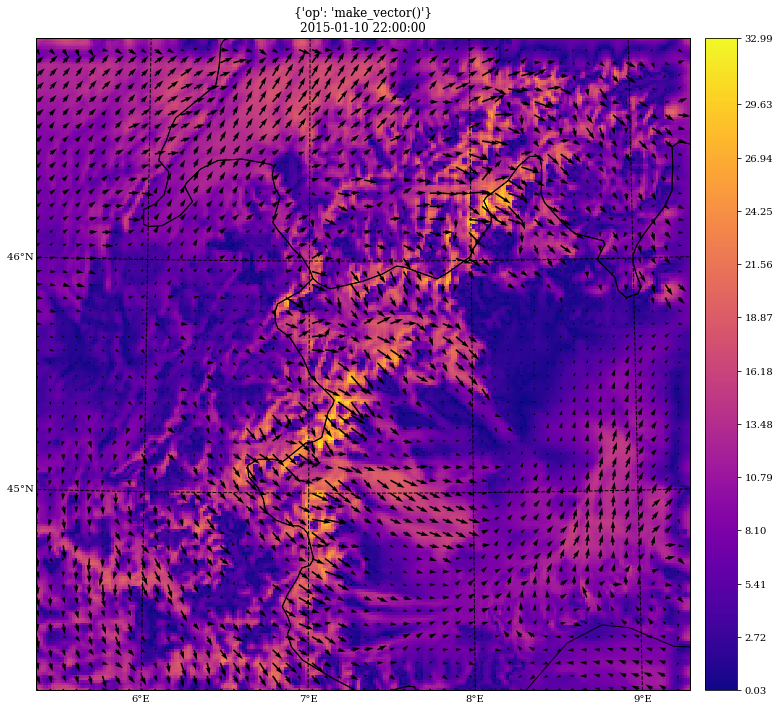

In [10]:
fig, ax = uv.cartoplot(subsampling=5, vector_plot_method='quiver')

In [14]:
# fields need to be spectral to compute vor/div : spectral derivatives are used
uv.gp2sp(spgeom)
vor, div = uv.compute_vordiv()

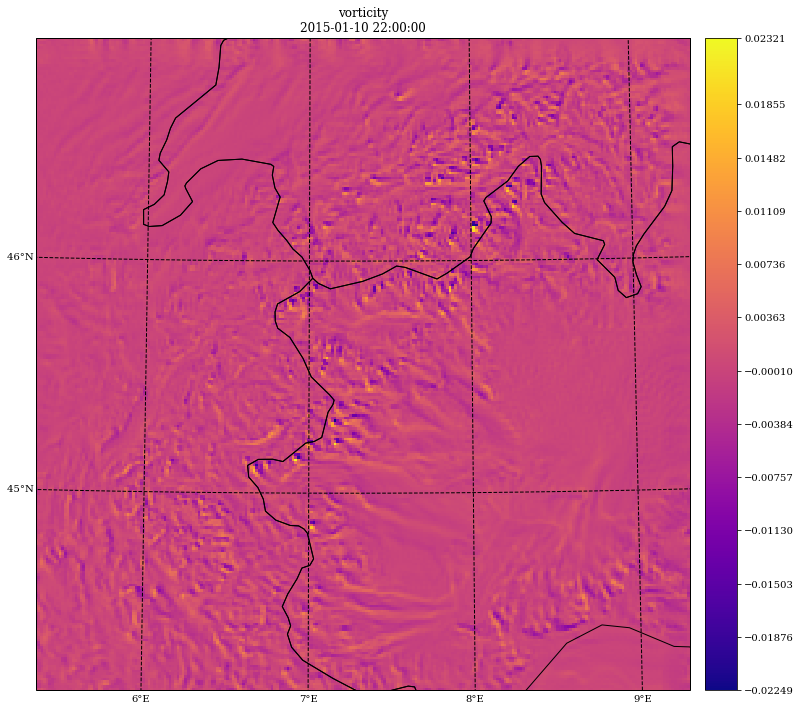

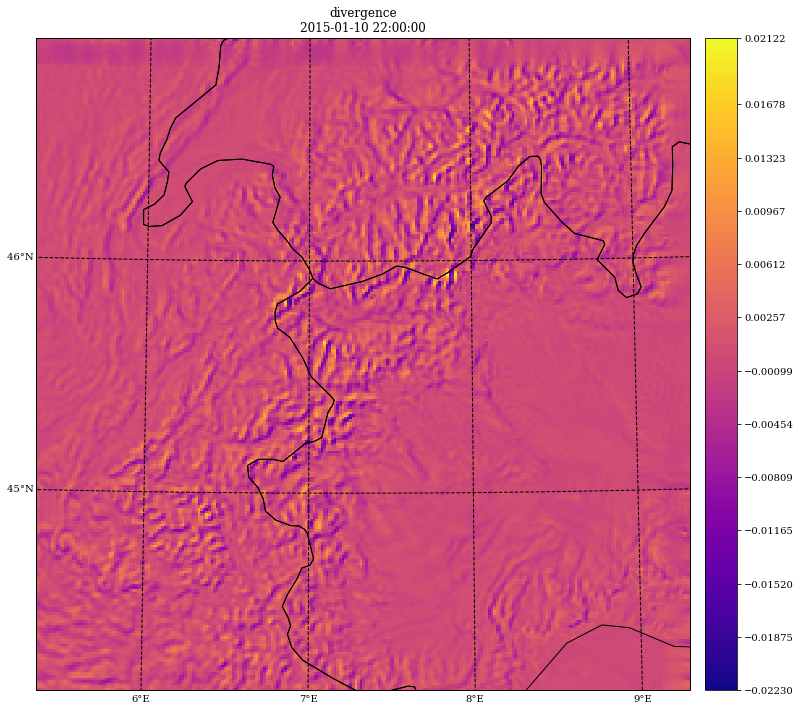

In [16]:
# map factor due to stretching:
fig, ax = vor.cartoplot()
fig, ax = div.cartoplot()